### Student Details

Your Name: Pierre-Louis JALLERAT

Erasmus Student

Student ID: 21181659

# Task 2: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers


In [ ]:
# import dependencies
import numpy as np
import pandas

In [ ]:
# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

In [ ]:
# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise


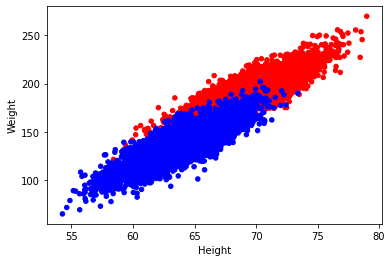

In [ ]:
#Ploting the data
colors = {'Male': '#FF0000', 'Female': '#0000FF'}
data.plot(kind='scatter', x='Height', y="Weight", c=data.Gender.map(colors))

###### Discuss: Do you think there is resonable separation?

We can clearly see a seperation with a cluster of red dot on the top right for the male and a cluster of blue dot on the bot left for the female.
So it seems that our classifier has some chance getting resonable result 

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [ ]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting. 

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [ ]:
################################
# Your code here

from sklearn.model_selection import  train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.33)

In [ ]:
#X features
print(X_train)
print(X_test)

         Height      Weight
7403  63.148437  125.386925
103   68.328448  177.984729
2386  66.402397  165.955935
3185  68.743647  189.780275
9373  61.647397  111.927796
...         ...         ...
1188  66.581999  181.227981
8287  59.955958  119.880437
3569  66.585094  175.056234
5706  60.107861  122.363789
5952  66.644635  145.540190

[6700 rows x 2 columns]
         Height      Weight
2294  71.317651  198.752471
3487  74.971936  237.575314
5955  65.593563  150.935054
3164  67.038865  167.912793
3446  70.691598  184.689523
...         ...         ...
935   74.080275  194.778854
7999  61.333935  127.655439
2366  70.253401  189.271869
2417  63.154272  119.242856
9226  63.545245  121.561150

[3300 rows x 2 columns]


In [ ]:
## Y predictiors
print(y_train)   
print(y_test)

7403    Female
103       Male
2386      Male
3185      Male
9373    Female
         ...  
1188      Male
8287    Female
3569      Male
5706    Female
5952    Female
Name: Gender, Length: 6700, dtype: object
2294      Male
3487      Male
5955    Female
3164      Male
3446      Male
         ...  
935       Male
7999    Female
2366      Male
2417      Male
9226    Female
Name: Gender, Length: 3300, dtype: object


### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [ ]:
from sklearn.naive_bayes import GaussianNB

gender_model = GaussianNB().fit(X_train, y_train)
#Generating a gender prediction based on our gender model with the test dataset
y_pred = gender_model.predict(X_test) 

### Test the algorithm
Using the test data

In [ ]:
#Prediction of the labels based on the test dataset
print("Prediction:  ",y_pred)
#Labels of the test dataset
print("True values: ", y_test.values)

Prediction:   ['Male' 'Male' 'Female' ... 'Male' 'Female' 'Female']
True values:  ['Male' 'Male' 'Female' ... 'Male' 'Male' 'Female']


In [ ]:
from sklearn.metrics import accuracy_score

#Now, we are going to compare our predicter gender labels with the knonw dataset of gender label
accuracy = accuracy_score(y_test, y_pred) 
print("The accuracy of our model is ", accuracy)

The accuracy of our model is  0.89


### Plot the random samples

First I will create a sample of 5000 people with random weight and height between reasonable ranges. Then I will use my gender model to predict the gender of each people.

In [ ]:
import random

X_test = []

for x in range(5000):
  random.seed(x)
  X_test.append([55 + random.random() * 23,60 + random.random() * 190])

#Generating a gender prediction with the test dataset based on our gender model
y_pred = gender_model.predict(X_test) 

In [ ]:
import pandas as pd

#Creating a dataframe with the random heights and weights, and the corresponding gender prediction
df = pd.DataFrame(X_test, columns = 'height weight'.split())
df['gender'] = y_pred

df.head()

,height,weight,gender
0,74.421703,204.011337,Male
1,58.090378,221.012410,Male
2,76.988788,240.087223,Male
3,60.473186,163.403553,Female
4,60.429106,79.601547,Female


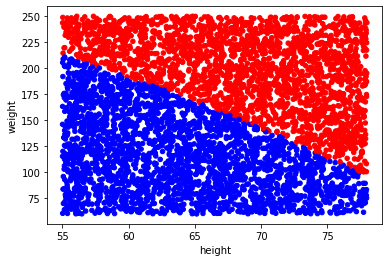

In [ ]:
#Plotting the data
colors = {'Male': '#FF0000', 'Female': '#0000FF'}
df.plot(kind='scatter', x='height', y="weight", c=df.gender.map(colors))